In [5]:
#utils
import pandas as pd
import numpy as np 

#stat and machine learning
from scipy.stats import kstest, norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

# First Look


We're gonna make try and understand here what are the factors that most contribute for the salary of DS professionals and what is the shape teh job market in the USA right now. To do so we're gonna analyse the most crucial features in the dataset and see how they relate to eachother.

In [30]:
data = pd.read_csv("data_cleaned_2021.csv",  escapechar='\n')
data = data.drop("index",axis=1)
data = data.drop(["Lower Salary", "Upper Salary", "Avg Salary(K)"], axis=1)
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data ScientistLocation: Albuquerque, NMEducati...",3.8,Tecolote Research3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,...,0,0,1,1,0,0,0,data scientist,na,M
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\nI. General Summary\nThe Hea...,3.4,University of Maryland Medical System3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,...,0,0,0,0,0,0,0,data scientist,na,M
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe44.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,M
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**Job ID: 310709\nDire...,3.8,PNNL3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,...,0,0,0,0,0,0,0,data scientist,na,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data ScientistAffinity Solutions / Marketing C...,2.9,Affinity Solutions2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,na


It looks like there are many complex string inputs. We really want to make some sense of all that information. But let's first take a step back and visualize some metrics of the numeric features. 



In [31]:
data.describe()

,Rating,Founded,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,spark,...,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,...,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.754717,128.214286,101.484501,47.524259,0.528302,0.225067,...,0.039084,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868
std,0.801210,497.183763,0.177034,0.149721,30.945892,45.128650,37.482449,53.839080,0.499535,0.417908,...,0.193925,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,12.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,25.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,60.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,277.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
#Getting some insight of the how many misisng values in the dataset and the types of the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           742 non-null    object 
 1   Salary Estimate     742 non-null    object 
 2   Job Description     742 non-null    object 
 3   Rating              742 non-null    float64
 4   Company Name        742 non-null    object 
 5   Location            742 non-null    object 
 6   Headquarters        742 non-null    object 
 7   Size                742 non-null    object 
 8   Founded             742 non-null    int64  
 9   Type of ownership   742 non-null    object 
 10  Industry            742 non-null    object 
 11  Sector              742 non-null    object 
 12  Revenue             742 non-null    object 
 13  Competitors         742 non-null    object 
 14  Hourly              742 non-null    int64  
 15  Employer provided   742 non-null    int64  
 16  Lower Sa

# Data Cleaning

Let's now take a look at the target variable aka "Salary_estimate" and how it's distributed. In order to do so we need an efficient way to map the salary range provided in the column to a numeric value 

In [33]:
def clean_salaries(data):
  
  #here I'm taking the two numbers from the salry column and combining them in a easier format
  data['num1'] = data['Salary Estimate'].str.extract('(\d+)').astype(int)
  data['num2'] = data['Salary Estimate'].str.extract('\d+\D+(\d+)').astype(int)
  data['range'] = data.apply(lambda x: f"{x['num1']}-{x['num2']}", axis=1)

  #dropping the newly created features
  data = data.drop(["num1", "num2"], axis=1)

  return data

def min_salaries(row):
    range = [int(num) for num in row["range"].split("-")]
    return min(range)

def median_salaries(row):
    range = [int(num) for num in row["range"].split("-")]
    return pd.Series(range).median()

def max_salary(row):
    range = [int(num) for num in row["range"].split("-")]
    return max(range)

data = clean_salaries(data)
data["min salary"] = data.apply(lambda row: min_salaries(row), axis=1)
data["median salary"] = data.apply(lambda row: median_salaries(row), axis=1)
data["max salary"] = data.apply(lambda row: max_salary(row), axis=1)

data.tail()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,range,min salary,median salary,max salary
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - CambridgePost...,3.9,GSK3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,Company - Public,...,0,0,0,other scientist,sr,M,58-111,58,84.5,111
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGEEventbrite has a world-class data...,4.4,Eventbrite4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,Company - Public,...,0,0,0,data engineer,sr,na,72-133,72,102.5,133
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,College / University,...,0,0,0,other scientist,na,P,56-91,56,73.5,91
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\nOversee...,3.2,"Numeric, LLC3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,Company - Private,...,0,0,0,data scientist,na,na,95-160,95,127.5,160
741,Research Scientist – Security and Privacy,$61K-$126K (Glassdoor est.),Returning Candidate? Log back in to the Career...,3.6,Riverside Research Institute3.6,"Beavercreek, OH","Arlington, VA",501 - 1000,1967,Nonprofit Organization,...,0,0,0,other scientist,na,M,61-126,61,93.5,126


Given the salary range we can either take the median point, the mean or the maximum. In the next plots we're gonna visualize the distribution of each and pick the most convient one. The most convinient one is gonna be the closest one to a normal distribution that still retains infomation about the salary range (doesn't lose too much information).

<AxesSubplot:xlabel='min salary', ylabel='Count'>

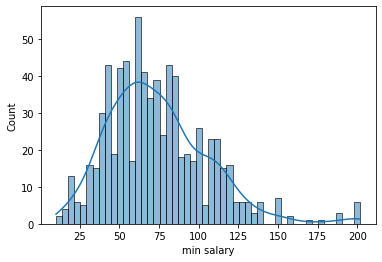

In [34]:
#let's plot the mean salaries distribution first 
sns.histplot(data["min salary"], bins=50, kde=True)

<AxesSubplot:xlabel='median salary', ylabel='Count'>

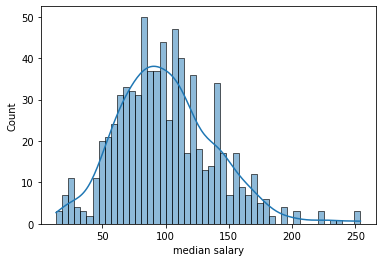

In [9]:
#this is instead the median salary
sns.histplot(data["median salary"], bins=50, kde=True)

<AxesSubplot:xlabel='max salary', ylabel='Count'>

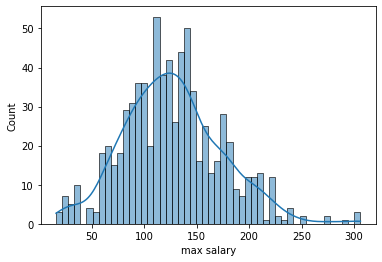

In [35]:
#max salary
sns.histplot(data["max salary"], bins=50, kde=True)

Here I'm gonna test which one of the three distribution is closer to the normal distribution using the Kolmogororv-Smirnov test. To do this I need to standardize the features first to take them to the same range as the normal distribution.

In [36]:
#takes a column from a dataframe and 
#returns it standardized

def standardize_col(column):
  
  return (data[column] - data[column].mean()) / data[column].std()



In [12]:
ks1, p1 = kstest(standardize_col("median salary"), norm.cdf)
ks2, p2 = kstest(standardize_col("min salary"), norm.cdf)
ks3, p3 = kstest(standardize_col("max salary"), norm.cdf)


print("KS statistic and p-value for the median salary:", ks1, p1)
print("KS statistic and p-value for the min salary:", ks2, p2)
print("KS statistic and p-value for the max salary:", ks3, p3)

KS statistic and p-value for the median salary: 0.05248274282888654 0.032363119235189974
KS statistic and p-value for the min salary: 0.07292593518127916 0.000706827017010045
KS statistic and p-value for the max salary: 0.05405599853419818 0.025203763648939947


1. The results for the KS-statistic vary between 0 and 1, where 0 it's a perfect match with the normal distribution while 1 it's the most distant value from it. The best bets seem to be the median and the max salary for now.

2. The p-value is instead telling us what is the probability to see values as extreme as the one observed. When the p-value is lower than 0.05 we can reject the hypothesis that our empirical distribution is actually drawn from the reference one (normal), in contrary if the p-value is bigger than 0.05 we cannot say with certainty of the distribution comes from the reference one. This said, all the three features have a p-value lower than 0.05 tehrefore it seems none of them could be drawn from a normal distribution. 

 

In [37]:
def relative_diff(a, b):
    return abs(a - b) / ((a + b) / 2)

# apply the function to each pair of values in the two columns
diff = data.apply(lambda x: relative_diff(x['max salary'], x['min salary']), axis=1)

# calculate the mean of the relative differences
print(diff.mean())

0.5403164031175346


Let's now consider the relative difefrence between the max and the min. This will tell us if it makes sense to use the median instead of any of teh otehr two values. If the average "relative difference" between min and max values in each row it's big enough then we should use the median salary as a target variable. With a relative difference of 54% it makes just more sense to use the "median salary" instead of the other two varibles.

In [14]:
data = data.drop(["max salary", "min salary"], axis=1)
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,range,median salary
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data ScientistLocation: Albuquerque, NMEducati...",3.8,Tecolote Research3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,...,1,1,0,0,0,data scientist,na,M,53-91,72.0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\nI. General Summary\nThe Hea...,3.4,University of Maryland Medical System3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,...,0,0,0,0,0,data scientist,na,M,63-112,87.5
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe44.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,...,0,0,0,0,0,data scientist,na,M,80-90,85.0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**Job ID: 310709\nDire...,3.8,PNNL3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,...,0,0,0,0,0,data scientist,na,na,56-97,76.5
4,Data Scientist,$86K-$143K (Glassdoor est.),Data ScientistAffinity Solutions / Marketing C...,2.9,Affinity Solutions2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,...,0,0,0,0,0,data scientist,na,na,86-143,114.5


We should now look at the second most important feature aka the "Job Title". First thing first we want to count the single entries or the different identified roles. It probably won't be a huge problem to just convert the string values to numeric ones. But before doing so let's look at the frequency of each, given there are many different entries we're just gonna look at the n most recurring ones.

In [15]:
data['Job Title'].nunique()

264

In [16]:
def visualize_freq_job():
  freq = data['Job Title'].value_counts().sort_values(ascending=False)

  # select the top 5 categories with the highest frequency
  top_n = 15
  top_categories = freq[:top_n]

  print("This is the total number of elements with one of the n-most recurring labels " + str(top_categories.sum()))
  print("This is the percentage of elements with one of the n-most recurring labels " + str(top_categories.sum() / len(data)))

  plt.barh(top_categories.index, top_categories.values)
  plt.title(f'Top {top_n} Categories by Frequency')
  plt.xlabel('Category')
  plt.ylabel('Count')
  plt.show()

This is the total number of elements with one of the n-most recurring labels 305
This is the percentage of elements with one of the n-most recurring labels 0.4110512129380054


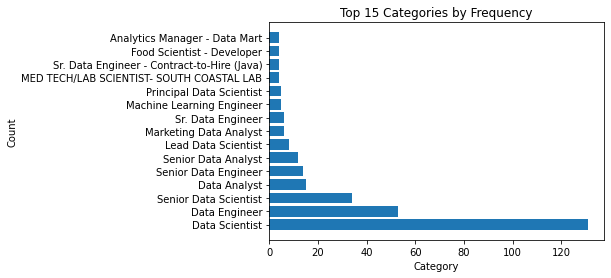

In [17]:
visualize_freq_job()

We can belive that this is somewhat representative of the total distribution given that they amount for up to 41% of the total. Nevertheless it looks evident that many of these labels are repetitions or contain useless specificity. We're gonna clean up the data a little bit such that any title like "Data scientist senior" and "Sr. data scientist" will be given the same value "DS senior".

In [18]:
def cleanFeature(column, values, new_name):

  data[column] = data[column].str.replace('|'.join(values), new_name, case=False)
  return data

<ipython-input-18-5b70e3a7f0a7>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data[column] = data[column].str.replace('|'.join(values), new_name, case=False)


This is the total number of elements with one of the n-most recurring labels 313
This is the percentage of elements with one of the n-most recurring labels 0.42183288409703507


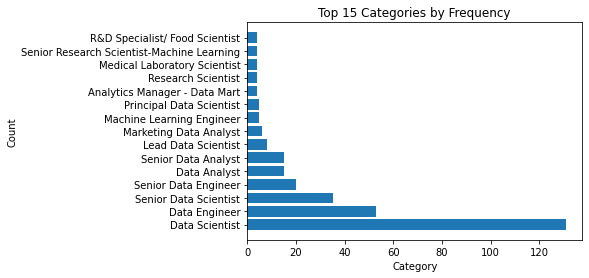

In [19]:
to_be_changed = ['Sr. Data Scientist', 'Senior Data Scientist']
data = cleanFeature("Job Title", to_be_changed, 'Senior Data Scientist')
to_be_changed = ['Senior Data Engineer', 'Sr. Data Engineer']
data = cleanFeature('Job Title' , to_be_changed, 'Senior Data Engineer')
to_be_changed = ['Senior Data Analyst', 'Sr. Data Analyst']
data = cleanFeature('Job Title' , to_be_changed, 'Senior Data Analyst')
visualize_freq_job()

Sadly given the vast amount of different values it's not possible to effectively clean the dataset of all the redundant information. But we can maybe focus on something more fun: visualizing where the salaries are higher using the USA map. To do this I'm gonna split the "Location" feature into "State" and "City", so we can also visualize the top paying cities even though I doubt there will be many surprises...

In [20]:
import plotly.express as px

data[['city', 'state']] = data['Location'].str.split(', ', expand=True, n= 1).fillna('Unknown')

#here I'm creating a dataframe that is gonna be funcitonal for the visualization
state_salary = data.groupby('state')['median salary'].median().reset_index()
state_salary.columns = ['state', 'state salary']
unique_states = state_salary.drop_duplicates(subset=['state']).reset_index(drop=True)

fig = px.choropleth(unique_states, locations='state', locationmode='USA-states', color='state salary',
                    scope='usa', color_continuous_scale='Plasma',
                    range_color=(unique_states['state salary'].min(), unique_states['state salary'].max()))
fig.update_layout(title='Data Scientists Salaries in the USA', title_x=0.5)
fig.show()

In [21]:
#creating a dataframe containing the median salaries for all the 
#cities with at least 10 entries in the dataframe

city_counts = data['city'].value_counts()
selected_cities = city_counts[city_counts >= 10].index.tolist()
city_salary = data[data['city'].isin(selected_cities)].groupby('city')['median salary'].median().reset_index()
city_salary.columns = ['city', 'city salary']
cities = city_salary.drop_duplicates(subset=['city']).reset_index(drop=True)

top_cities = cities.nlargest(10, 'city salary')
fig = px.bar(top_cities, x='city', y='city salary', color='city salary', 
             color_continuous_scale='RdBu', title='Top 10 Cities with Highest Average Salary')

# Set the x-axis label
fig.update_xaxes(title_text='City')

# Set the y-axis label
fig.update_yaxes(title_text='Average Salary')

# Show the plot
fig.show()

Here, after taking into consideration the number of entries (at least 10), it emerges a clear pattern that matches with the real world. In fat yhe cities with higher salaries are the ones where the tech industry is more prolific, no wonder "San Jose" comes on top...

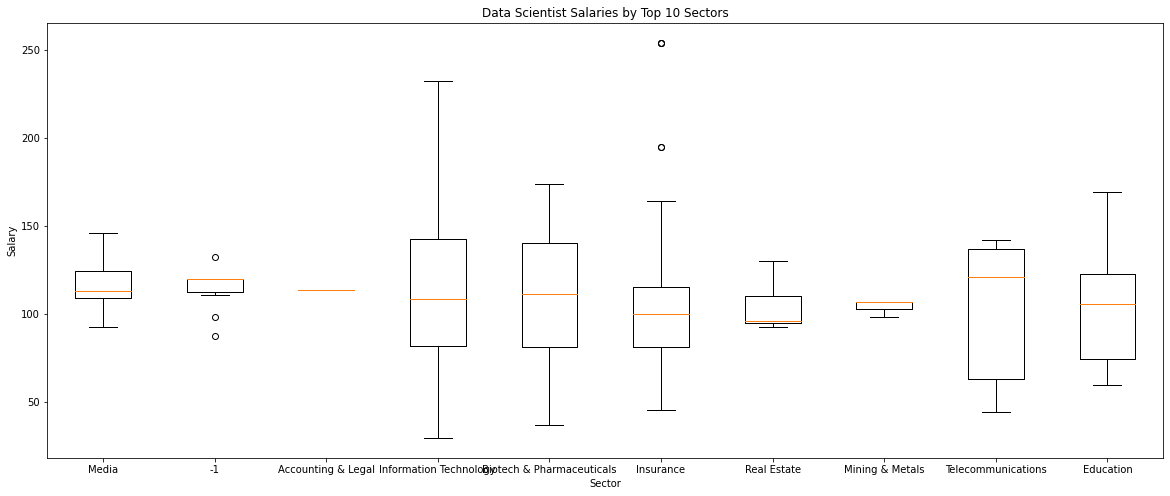

In [70]:
top10_sectors = data.groupby('Sector')['median salary'].mean().nlargest(10).index.tolist()
top10_sectors.sort(key=lambda x: data[data['Sector']==x]['median salary'].mean(), reverse=True)

# Filter the original dataframe to include only the top 10 sectors
top10 = data[data['Sector'].isin(top10_sectors)]

# Create a box plot of salaries by sector for the top 10 sectors
plt.figure(figsize=(20, 8))
plt.boxplot([top10[top10['Sector'] == s]['median salary'] for s in top10_sectors], labels=top10_sectors)
plt.xlabel('Sector')
plt.ylabel('Salary')
plt.title('Data Scientist Salaries by Top 10 Sectors')
plt.show()

As shown above the sectors in which data scientist are highly compensated are not the necessarily the most obvious ones (eg. Real estate, education) while they are more widely employes, as the "whiskers" spread show, in the IT industry, in Biotech and in INsurance. We come to this conclusion by inferring that an higher variance means that more professional figures, with different years of experience and business responsabilities, are employed and given varying salaries.

In [22]:
data_scientists = data[data.job_title_sim.str.contains('data scientist')]

<BarContainer object of 10 artists>

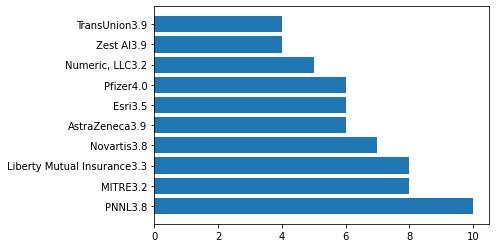

In [23]:
plt.barh(data_scientists['Company Name'].value_counts().index[:10] , data_scientists['Company Name'].value_counts().values[:10])

The above plot is instead showing us which companies are employing the highest number of data scientists! Still no surprise there's an high demand in the health sector.

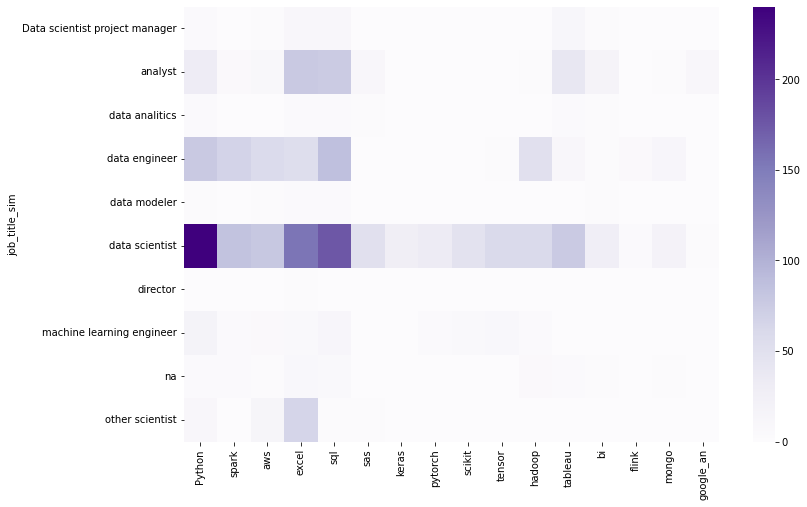

In [28]:
skill_labels = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch',
                'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']
skills_by_title = data.groupby('job_title_sim')[skill_labels].sum()
plt.figure(figsize=(12, 8))
sns.heatmap(skills_by_title, cmap='Purples')
plt.show()

Finally the above chart is telling us which are the most in demand skills for the different jobs. The color range reprensents the feature importance such that the darker it is the more important it will be for the job to have the corresponding skill.

# Patterns start to emerge...

If we want to develop a performant model, we need to clearly identify which are the most relevant independent variables given our target varible "median salary"...let's start by taking the correlation matrix of all the features and then narrow a bit the scope of our analysis...

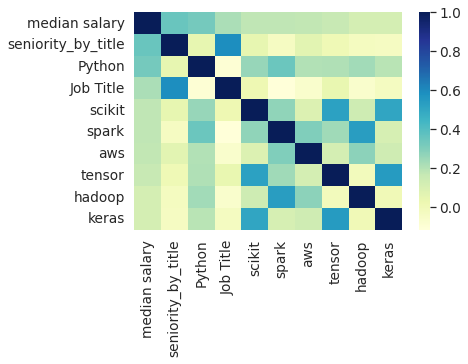

In [245]:
copy = data.copy()

le = LabelEncoder()

# apply the LabelEncoder to all categorical columns
for col in copy.select_dtypes(include='object').columns:
    copy[col] = le.fit_transform(copy[col])

corr = copy.corr()
top_features = corr.nlargest(10, 'median salary')['median salary'].index
top_corr = copy[top_features].corr()

# plot the heatmap of the top 10 most correlated features
sns.set(font_scale=1.25)
sns.heatmap(top_corr, cmap='YlGnBu')
plt.show()

Something seems off...the correlation between "median salary" and any other variable seems very low, very low...the only slight correlation is among "seniority by title" and "python"...this makes us understand how very diverse this field is and how there is no silver bullet, maybe python...also it's important to consider that in this dataset there are many different professional figures not just data scientists...let's keep on digging!